In [398]:
import os.path as path
import numpy as np
import seaborn as sns

In [399]:
LOCAL_PATH = '/Users/Edu/data/yass'
REMOTE_PATH = '/ssd/data/eduardo/'

LOCAL = False

PATH = LOCAL_PATH if LOCAL else REMOTE_PATH

OLD = path.join(PATH, 'old-threshold')
NEW = path.join(PATH, 'new-threshold')

In [400]:
OLD = path.join(PATH, 'old-nnet')
NEW = path.join(PATH, 'new-nnet')

In [401]:
def n_groups(spike_train):
    return len(np.unique(spike_train[:, 1]))

def groups(spike_train):
    return np.unique(clear_new[:, 1], return_counts=True)

In [402]:
OLD, NEW

('/ssd/data/eduardo/old-nnet', '/ssd/data/eduardo/new-nnet')

In [403]:
clear_old = np.load(path.join(OLD, 'spike_index_clear.npy'))
clear_new = np.load(path.join(NEW, 'spike_index_clear.npy'))

In [404]:
clear_old.shape, clear_new.shape

((103459, 2), (109861, 2))

In [405]:
clear_old[:20]

array([[  11,   16],
       [  11,   28],
       [ 132,   21],
       [ 186,    6],
       [ 187,   23],
       [ 242,   16],
       [ 356,    9],
       [ 373,   15],
       [ 431,   10],
       [ 551,   13],
       [ 590,   16],
       [ 744,   20],
       [ 771,   18],
       [ 773,   17],
       [ 847,    2],
       [ 949,   17],
       [ 993,    7],
       [1039,   16],
       [1060,    0],
       [1084,   15]], dtype=int32)

In [406]:
clear_new[:20]

array([[ 132,   21],
       [ 186,    6],
       [ 187,   23],
       [ 242,   16],
       [ 356,    9],
       [ 402,   20],
       [ 404,    9],
       [ 431,   10],
       [ 433,    7],
       [ 551,   13],
       [ 590,   16],
       [ 660,   24],
       [ 744,   20],
       [ 771,   18],
       [ 773,   17],
       [ 847,    2],
       [ 993,    7],
       [1039,   16],
       [1060,    0],
       [1084,   15]])

In [407]:
clear_old[clear_old[:, 1] == 0]

array([[   1060,       0],
       [   2571,       0],
       [   2753,       0],
       ..., 
       [5995459,       0],
       [5999320,       0],
       [5999391,       0]], dtype=int32)

In [408]:
old_main0 = clear_old[clear_old[:, 1] == 0][:, 0]
old_main0

array([   1060,    2571,    2753, ..., 5995459, 5999320, 5999391], dtype=int32)

In [409]:
new_main0 = clear_new[clear_new[:, 1] == 0][:, 0]
new_main0

array([   1060,    2571,    2753, ..., 5996384, 5999320, 5999391])

In [410]:
_, c = np.unique(new_main0, return_counts=True)
np.unique(c)

array([1])

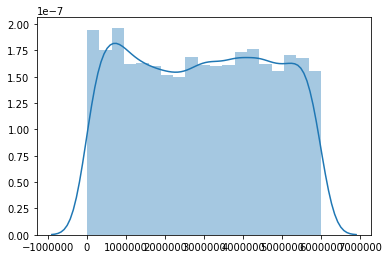

In [411]:
sns.distplot(old_main0)

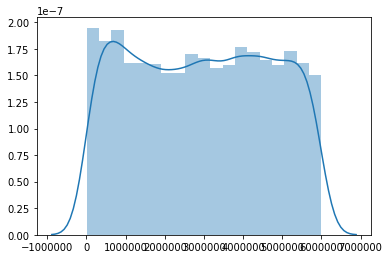

In [412]:
sns.distplot(new_main0)

In [415]:
col_old = np.load(path.join(OLD, 'spike_index_collision.npy'))
col_new = np.load(path.join(NEW, 'spike_index_collision.npy'))

In [416]:
col_old.shape, col_new.shape

((436477, 2), (443165, 2))

In [417]:
n_groups(col_old), n_groups(col_new)

(49, 49)

In [418]:
col_old[:10,]

array([[11,  3],
       [11, 20],
       [11, 25],
       [11, 31],
       [11, 45],
       [22, 18],
       [28, 46],
       [57, 43],
       [64, 46],
       [65, 39]], dtype=int32)

In [419]:
col_new[:10,]

array([[ 22,  18],
       [ 28,  46],
       [ 57,  43],
       [ 64,  46],
       [ 65,  39],
       [ 79,  39],
       [ 81,  32],
       [ 83,  38],
       [ 84,   4],
       [185,  40]])

In [420]:
old_train = np.load(path.join(OLD, 'spike_train.npy'))
new_train = np.load(path.join(NEW, 'spike_train.npy'))

In [421]:
old_train.shape, new_train.shape

((279151, 2), (664713, 2))

In [422]:
n_groups(old_train), n_groups(new_train)

(76, 86)